------REDTUBE--------------
[1.09641440e-15 5.65812946e-17 9.73599116e-17 4.81886373e-16
 1.43817243e-16 7.02874309e-17]
[0.07855906 0.07855906 0.07855906 0.07855906 0.07855906 0.07855906]
chi^2_min = 34.383975112840524
reduced chi^2 = 8.595993778210131
P(chi^2_min, DoF) = 6.215768361761839e-07
optimised parameter[0] = (5.0662975899933886e-05 +/- 2.583536069592817e-07) units
optimised parameter[1] = (4.970403138853933e-06 +/- 3.0674972791296994e-08) units
5.0662975899933886e-05 -gradient of Redtube, 2.583536069592817e-07 error of gradient for Redtube
2.672908730422249e-06 hi
1.0272908172845039 m Pa s viscoscity Redtube error 0.19735484065666772


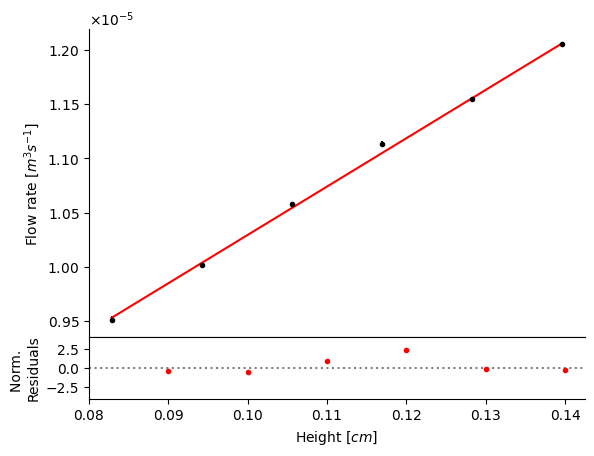

------BLACKTUBE--------------
[5.56448430e-18 7.33382238e-17 2.77808335e-16 7.25525065e-17
 1.55258394e-17 1.23177722e-20]
[0.08680733 0.08680733 0.08680733 0.08680733 0.08680733 0.08680733]
chi^2_min = 39.39965661923031
reduced chi^2 = 9.849914154807578
P(chi^2_min, DoF) = 5.760232510807002e-08
optimised parameter[0] = (1.5883690196222634e-05 +/- 4.541141642673422e-08) units
optimised parameter[1] = (8.430319334648157e-07 +/- 6.352678290425804e-09) units
1.5883690196222634e-05 -gradient of Blacktube, 4.541141642673422e-08 error of gradient for Blacktube
7.350502040390289e-07 hi
0.28250509127302226 m Pa s viscoscity Blacktube error 0.344485260861341
------WHITETUBE--------------
[8.11790561e-20 5.59829264e-20 1.71921938e-17 8.45856796e-18
 9.79395492e-18 1.03306868e-18]
[0.06242234 0.06242234 0.06242234 0.06242234 0.06242234 0.06242234]
chi^2_min = 1016.5458086920589
reduced chi^2 = 254.13645217301473
P(chi^2_min, DoF) = 9.26473308520992e-219
optimised parameter[0] = (1.082929459790657

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import scipy
import numpy 

def linear_function(x, m, b):
    return m * x + b

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!








def main():
    #Initalise tube widths and lengths
    tubes_dict = {'Redtube':[0.00213,0.1520,'red'], 'Blacktube':[0.00117,0.1605,"navy"], 'Whitetube':[0.00103,0.1510,"green"]}
    #Initalise subplots
    axes_visc = plt.subplot2grid((6,1),(0,0) ,rowspan=5) #creates 2 subplots
    axes_resid = plt.subplot2grid((6,1),(5,0) ,rowspan=1)
    plt.subplots_adjust(hspace=0) #adjusts there to be no gap between to sub plots
    #Loops through each individual tube
    for tube_colour, tube_measurements in tubes_dict.items():
        print(f"------{tube_colour.upper()}--------------")
        mean_gradients = []
        mean_gradients_err = []
        #Loops through the different heights
        for distance in range(9, 15):
            gradients_3trials = []
            gradients_err_3trials = np.array([])
            #Loops through 3 trials for each height
            for measurement in range(1, 4):
                #Finds the file for relevant tube,height and trial
                filename = f"{tube_colour}/datah-{distance}cm-{measurement}.dat"

                
                # Load data from file
                data = np.loadtxt(filename)
                x = data[:, 0]/1000 #convert ms to s
                y_grams = data[:, 1]# grams to cm^3 to m^3
                y = (data[:, 1]/(0.997655))/1e6 
                


                # Perform chi-squared fit for the 3 trials
                popt, pcov = curve_fit(linear_function, x, y, sigma=[i*np.sqrt((0.001/i))**2 + (2.3e-5/0.997655)**2 + (0.1/22.5)**2 for i in y_grams],absolute_sigma=True)
                gradient = popt[0]
                intercept = popt[1]
                gradient_err = np.sqrt(pcov[0,0])
                
                #Adds each gradient to the list of the gradients for 3 trials
                gradients_3trials = np.append(gradient,gradients_3trials)
                gradients_err_3trials = np.append(gradient_err,gradients_err_3trials)
                

            #Calculate mean of gradients and add this to list for tube colour
            mean_grad = np.average(gradients_3trials)
            mean_gradients = np.append(mean_gradients,mean_grad)
            #Error in the mean of the 3 gradients

            mean_gradients_err = np.append(mean_gradients_err,np.std(gradients_3trials)/np.sqrt(3))
            
        
            
            
           

        #Plot a graph of mean gradient vs height
        #Creates an array with the heights
        dists = np.array([0.09,0.10,0.11,0.12,0.13,0.14])
        colour = tube_measurements[2]
        

        
        #Plots the gradients (dv/dt) vs the heights
        axes_visc.errorbar(dists,mean_gradients,yerr=mean_gradients_err,label=tube_colour,fmt=".",color="black")
        axes_visc.spines['right'].set_visible(False)
        axes_visc.spines['top'].set_visible(False)

        #Obtains a line of best fit
        popt, pcov = curve_fit(linear_function,dists , mean_gradients,sigma=mean_gradients_err,absolute_sigma=True)
        gradient = popt[0]
        intercept = popt[1]
        err_grad = np.sqrt(pcov[0,0])
        err_intercept = np.sqrt(pcov[1,1])

        #Plot line of best fit on top of data
        expected_ys = dists.astype(float)*float(gradient)+intercept
        
        axes_visc.plot(dists,expected_ys,color=colour)
        axes_visc.set_ylabel("Flow rate [$m^{3} s^{-1}$]")
        formatter = mticker.ScalarFormatter(useMathText=True)
        axes_visc.yaxis.set_major_formatter(formatter)

        #Residual stuff
        residual_ys = (mean_gradients - expected_ys)
        norm_residual_ys = (mean_gradients - expected_ys)/np.std(residual_ys)
        err_resid_ys = np.sqrt(np.sqrt(((gradient*dists)**2)*np.sqrt((err_grad/gradient)**2 + (0.0005/dists)**2) + (err_intercept/intercept)**2))#*np.std(residual_ys)
        print((mean_gradients_err)**2)
        
        print(err_resid_ys)
        # alpha predicted = m*h (alpha m/m + alpha c/c  (dv)
        
        axes_resid.errorbar(dists,norm_residual_ys,yerr=err_resid_ys,fmt=".",color=colour)
        
        axes_resid.set_ylabel('Norm. \nResiduals',loc="center")
        axes_resid.set_xlabel('Height [$cm$]')
        axes_resid.set_xlim(xmin=0.08)
        axes_resid.axhline(color='grey', linestyle=':')
        axes_resid.spines['right'].set_visible(False)
        axes_resid.set_ylim(ymin=-4,ymax=4)

        #Gaussian fit to residuals
        #popt, pcov = curve_fit(gaussian, dists, norm_residual_ys)
        #sample_xs = np.linspace(0.07,0.15,100)
        #axes_resid.hist(abs(norm_residual_ys),bins=6)

        
        #Chi Squared stuff
        chi_squared_min = chi_squared(popt, linear_function, dists, mean_gradients, mean_gradients_err)
        print('chi^2_min = {}'.format(chi_squared_min))

        degrees_of_freedom = dists.size - popt.size
        print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
        print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))

        popt_errs = numpy.sqrt(numpy.diag(pcov))

        for i, (val, err) in enumerate(zip(popt, popt_errs)):
            print('optimised parameter[{}] = ({} +/- {}) units'.format(i, val, err))

    
        
        #Calculating value of viscoscity
        pi = np.pi
        rho = 997.655
        g = 9.81
        a= tube_measurements[0]
        l = tube_measurements[1]

        print(f"{gradient} -gradient of {tube_colour}, {err_grad} error of gradient for {tube_colour}")
        nu = 100*(pi*rho*g*(a**4))/(8*l*gradient)
        print((a**4)/(l*gradient),"hi")
        err_nu =10* np.sqrt((2.3e-2/997.655)**2   + 4*(0.00002/a)**2 + (0.0005/l)**2 + (err_grad/gradient)**2)

        print((nu),"m Pa s viscoscity",tube_colour,"error",err_nu)
        plt.show()

#plt.legend()



if __name__ == "__main__":
    main()


In [122]:
np.linalg.norm([1,1,1],2)

1.7320508075688772